Иморт библиотек и заранее подготовленных данных


importing Jupyter notebook from import_librares.ipynb


c:\course_work\feature_extraction_NLP\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


importing Jupyter notebook from func.ipynb


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NitghtWay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


importing Jupyter notebook from rus_ds_data.ipynb


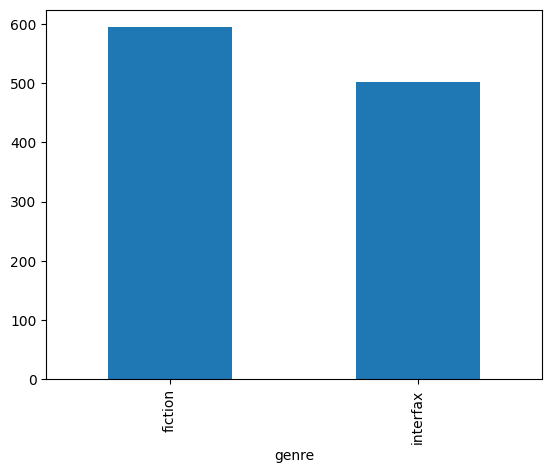

In [2]:
import import_ipynb
import import_librares # ноутбук с импортом библиотек
import func # ноутбук с функциями
import rus_ds_data # ноутбук с загрузкой и предварительной обрабткой русского датасета
from ipynb.fs.full.func import tokenize_morphy, tokenize_lancaster, tokenize_snowball
from sklearn.metrics import accuracy_score

In [3]:
from import_librares import CountVectorizer, TfidfVectorizer, pd, np, plt, train_test_split\
,LogisticRegression, classification_report, roc_auc_score, MaxAbsScaler, GridSearchCV\
,cross_val_score, ppb, Word2Vec

In [4]:
from rus_ds_data import\
    df, Y, df_morphy, df_snowball, df_lancaster\
    , X1, X2, X3, batch1, batch2, batch3

Обучение


In [5]:
X_train, X_test, y_train, y_test = train_test_split(batch2[['text']], batch2['genre'], test_size = 0.3, random_state = 45)

In [6]:
from gensim.models import Word2Vec
sent = [row.split() for row in X_train['text']]

In [7]:
HIDDEN = 100
model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=HIDDEN,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=2)
model.build_vocab(sent, progress_per=10000)
model.train(sent, total_examples=model.corpus_count, epochs=30, report_delay=1)

(27078, 625650)

In [8]:
#счет последнего вектора текста
def get_mean_w2v_vector(sentence):
    Sum = 0
    Count = 0

    try:
      words = sentence.split()
    except TypeError:
      words = []

    for w in words:
        if w in model.wv:
            Sum += model.wv[w]
            # Sum += glove_vectors[w]
            Count += 1

    if Count == 0:
        return 0

    return Sum / Count

In [9]:
NewCols = ['col'+str(i) for i in range(HIDDEN)]

X_train['vectors'] = X_train['text'].map(get_mean_w2v_vector)
X_test['vectors'] = X_test['text'].map(get_mean_w2v_vector)

X_train.head()

,text,vectors
994,мать умерший мужчина тоже подтвердить что дево...,"[0.060191505, 0.27429134, 0.09636641, -0.16165..."
1035,плевать на всё пойти прямиком к она позвонить ...,"[0.06273627, 0.2743045, 0.094713934, -0.163712..."
913,он ни при что он хороший это мама так не вовре...,"[0.055258725, 0.2743931, 0.09586518, -0.161232..."
91,казаться такой мужчина называться брачный афер...,"[0.05721231, 0.27549663, 0.0919304, -0.1637491..."
943,есть смаковать каждый блюдо разговор и шутка у...,"[0.057706513, 0.27336773, 0.095066026, -0.1676..."


In [10]:
IdxTrain = []

for ix, row in X_train.iterrows():
    if not isinstance(row['vectors'],np.ndarray):
        IdxTrain.append(ix)

IdxTest = []

for ix, row in X_test.iterrows():
    if not isinstance(row['vectors'],np.ndarray):
        IdxTest.append(ix)

In [11]:
X_train.drop(index=IdxTrain, inplace=True)
X_test.drop(index=IdxTest, inplace=True)

y_train = y_train.drop(index=IdxTrain)
y_test = y_test.drop(index=IdxTest)

In [12]:
X_train[NewCols] = pd.DataFrame(X_train['vectors'].tolist(), index=X_train.index)
X_test[NewCols] = pd.DataFrame(X_test['vectors'].tolist(), index=X_test.index)

In [13]:
X_train.head()

,text,vectors,col0,col1,col2,col3,col4,col5,col6,col7,...,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99
994,мать умерший мужчина тоже подтвердить что дево...,"[0.060191505, 0.27429134, 0.09636641, -0.16165...",0.060192,0.274291,0.096366,-0.161656,0.209476,-0.424743,0.232285,0.597188,...,0.166377,0.285431,0.054021,-0.081415,0.394132,0.056020,0.077737,-0.102539,-0.080458,-0.026793
1035,плевать на всё пойти прямиком к она позвонить ...,"[0.06273627, 0.2743045, 0.094713934, -0.163712...",0.062736,0.274305,0.094714,-0.163713,0.211298,-0.426804,0.232339,0.601922,...,0.165936,0.285370,0.052577,-0.078824,0.393861,0.056152,0.078546,-0.102994,-0.081590,-0.027077
913,он ни при что он хороший это мама так не вовре...,"[0.055258725, 0.2743931, 0.09586518, -0.161232...",0.055259,0.274393,0.095865,-0.161233,0.211056,-0.428726,0.235169,0.602376,...,0.163560,0.289239,0.050762,-0.080358,0.400342,0.059198,0.077831,-0.100673,-0.082062,-0.029380
91,казаться такой мужчина называться брачный афер...,"[0.05721231, 0.27549663, 0.0919304, -0.1637491...",0.057212,0.275497,0.091930,-0.163749,0.211503,-0.426639,0.234562,0.601739,...,0.163933,0.287119,0.052864,-0.080293,0.398249,0.056246,0.077671,-0.101813,-0.081080,-0.024079
943,есть смаковать каждый блюдо разговор и шутка у...,"[0.057706513, 0.27336773, 0.095066026, -0.1676...",0.057707,0.273368,0.095066,-0.167687,0.208657,-0.427629,0.235040,0.601119,...,0.165298,0.284867,0.048346,-0.083244,0.393337,0.058949,0.078704,-0.102620,-0.081800,-0.021554


In [14]:
X_train.drop(['text','vectors'], axis=1, inplace=True)
X_test.drop(['text','vectors'], axis=1, inplace=True)

In [17]:
X_train.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99
994,0.060192,0.274291,0.096366,-0.161656,0.209476,-0.424743,0.232285,0.597188,-0.159573,-0.440512,...,0.166377,0.285431,0.054021,-0.081415,0.394132,0.056020,0.077737,-0.102539,-0.080458,-0.026793
1035,0.062736,0.274305,0.094714,-0.163713,0.211298,-0.426804,0.232339,0.601922,-0.160034,-0.442366,...,0.165936,0.285370,0.052577,-0.078824,0.393861,0.056152,0.078546,-0.102994,-0.081590,-0.027077
913,0.055259,0.274393,0.095865,-0.161233,0.211056,-0.428726,0.235169,0.602376,-0.160201,-0.445858,...,0.163560,0.289239,0.050762,-0.080358,0.400342,0.059198,0.077831,-0.100673,-0.082062,-0.029380
91,0.057212,0.275497,0.091930,-0.163749,0.211503,-0.426639,0.234562,0.601739,-0.159926,-0.444804,...,0.163933,0.287119,0.052864,-0.080293,0.398249,0.056246,0.077671,-0.101813,-0.081080,-0.024079
943,0.057707,0.273368,0.095066,-0.167687,0.208657,-0.427629,0.235040,0.601119,-0.153577,-0.442653,...,0.165298,0.284867,0.048346,-0.083244,0.393337,0.058949,0.078704,-0.102620,-0.081800,-0.021554


In [15]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

lr_train_pred = lr_clf.predict(X_train)
lr_test_pred = lr_clf.predict(X_test)

accuracy_score(y_train, lr_train_pred), accuracy_score(y_test, lr_test_pred)

(0.5509138381201044, 0.5197568389057751)

In [16]:
print(classification_report(y_test, lr_test_pred))

              precision    recall  f1-score   support

     fiction       0.52      1.00      0.68       171
    interfax       0.00      0.00      0.00       158

    accuracy                           0.52       329
   macro avg       0.26      0.50      0.34       329
weighted avg       0.27      0.52      0.36       329

